### 1. 이미지 처리

In [60]:
!pip install opencv-python

(2270, 3600, 3)


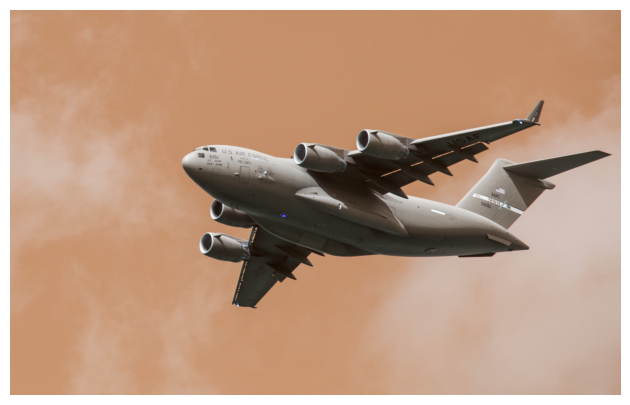

In [61]:
# pip install opencv-python

import cv2

import numpy as np

from matplotlib import pyplot as plt

# 흑백 이미지로 로드

#image = cv2.imread("../DATA/images/plane.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.imread("../DATA/images/plane.jpg")
print(image.shape)
##############################

# 이미지를 출력

plt.imshow(image, cmap="gray")

plt.axis("off")

plt.show()



In [62]:
##############################

# 데이터 타입을 확인

type(image)

#

numpy.ndarray

In [63]:
#############################

# 이미지 데이터를 확인

image



array([[[195, 144, 111],
        [191, 140, 107],
        [201, 150, 117],
        ...,
        [187, 136, 103],
        [194, 143, 110],
        [189, 138, 105]],

       [[199, 148, 115],
        [191, 140, 107],
        [204, 153, 120],
        ...,
        [197, 146, 113],
        [179, 128,  95],
        [181, 130,  97]],

       [[207, 156, 123],
        [194, 143, 110],
        [199, 148, 115],
        ...,
        [176, 125,  92],
        [182, 131,  98],
        [189, 138, 105]],

       ...,

       [[211, 162, 124],
        [201, 152, 114],
        [201, 149, 112],
        ...,
        [189, 159, 140],
        [186, 156, 137],
        [183, 153, 134]],

       [[201, 152, 114],
        [205, 156, 118],
        [202, 153, 115],
        ...,
        [188, 158, 139],
        [190, 160, 141],
        [187, 160, 140]],

       [[200, 148, 111],
        [195, 143, 106],
        [204, 152, 115],
        ...,
        [188, 158, 139],
        [187, 160, 140],
        [187, 160, 140]]

In [64]:
##############################

# 이미지의 해상도(차원)

image.shape



(2270, 3600, 3)

In [65]:
##############################

# 컬러로 이미지를 로드

image_bgr = cv2.imread("../DATA/images/plane.jpg", cv2.IMREAD_COLOR)

image_bgr.shape

# 픽셀 확인

#image_bgr

##############################

(2270, 3600, 3)

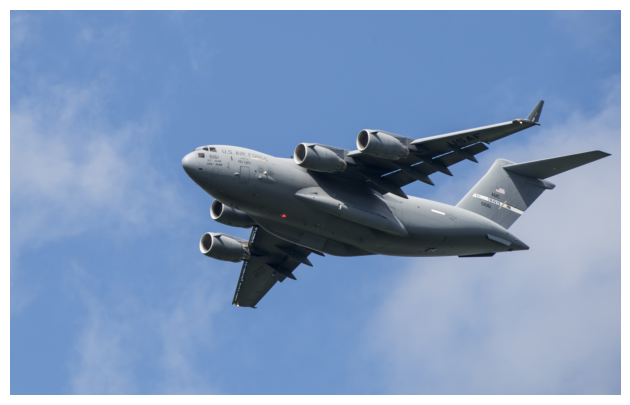

In [66]:
# opencv에서는 bgr color를 사용하므로 matplotlib에서 출력하려면 변환해야 함

plt.imshow(image_bgr)

# BGR을 RGB로 변환

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 이미지를 출력

plt.imshow(image_rgb)

plt.axis("off")

plt.show()

In [67]:
# 이미지 저장

cv2.imwrite("../DATA/images/plane_new.jpg", image)

True

(50, 50)


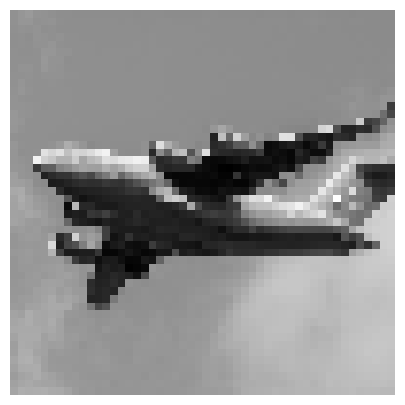

In [68]:
# 이미지 크기 변경

# 이미지 사이즈를 조절하는 이유

# 1. 다양한 사이즈의 이미지를 데이터 분석에 사용하려면 사이즈를 통일해야 함

# 2. 이미지 크기를 줄여서 메모리 사용량을 줄일 수 있음

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 크기를 50x50 픽셀로 변환

image_50x50 = cv2.resize(image, (50, 50))

print(image_50x50.shape)

# 이미지를 출력

plt.imshow(image_50x50, cmap="gray")

plt.axis("off")

plt.show()

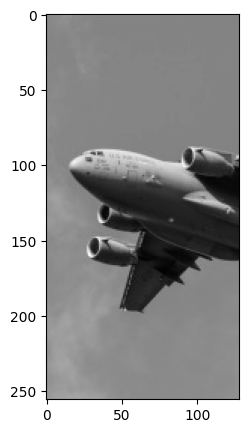

In [69]:
# 이미지 자르기

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 열의 처음 절반과 모든 행을 선택

image_cropped = image[:,:128]

# 이미지를 출력

plt.imshow(image_cropped, cmap="gray")

plt.show()

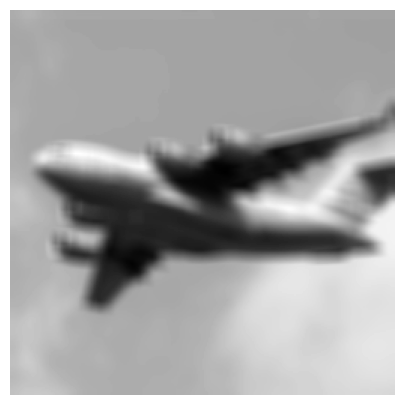

In [70]:
# 이미지 흐리게 하기

# 이미지를 흐리게 하려면 각 픽셀을 주변 픽셀의 평균값으로 변환

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지를 흐리게

# 커널 사이즈 10x10, 커널 사이즈가 클수록 이미지가 더 부드러워지게 됨

image_blurry = cv2.blur(image, (10,10))

# 이미지를 출력

plt.imshow(image_blurry, cmap="gray"), plt.axis("off")

plt.show()

In [71]:
# 커널을 만드는 방법

# 5x5 커널

kernel = np.ones((5,5)) / 25.0

# 커널의 값을 모두 더하면 1

print(sum(kernel.flatten()))

# 커널을 확인

print(kernel)

1.0000000000000002
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


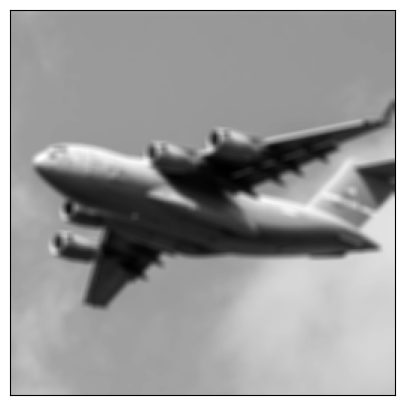

In [72]:
# 커널을 적용

#src: 이미지

#ddepth: 이미지 깊이(자료형 크기). -1이면 입력과 동일

#kernel: 커널 행렬

image_kernel = cv2.filter2D(image, -1, kernel)

# 이미지를 출력

plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])

plt.show()

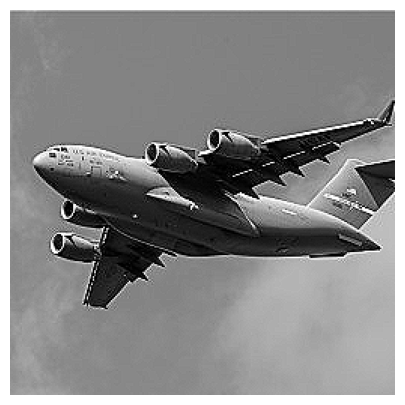

In [73]:
# 이미지를 선명하게 처리

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 중앙 픽셀을 부각하는 커널

kernel = np.array([[0, -1, 0],

                   [-1, 5,-1],

                   [0, -1, 0]])

# 이미지를 선명하게 처리

image_sharp = cv2.filter2D(image, -1, kernel)

# 이미지를 출력

plt.imshow(image_sharp, cmap="gray"), plt.axis("off")

plt.show()

#이미지의 경계선에서 대비가 강조되게 됨

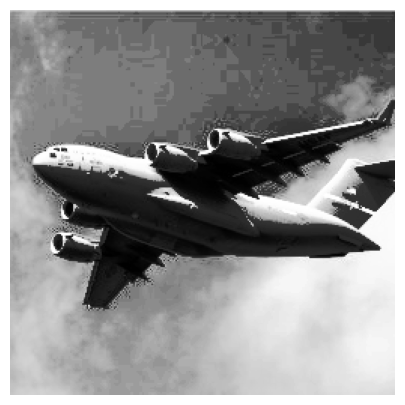

In [74]:
# 대비 향상

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상시킴

image_enhanced = cv2.equalizeHist(image)

# 이미지를 출력

plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")

plt.show()

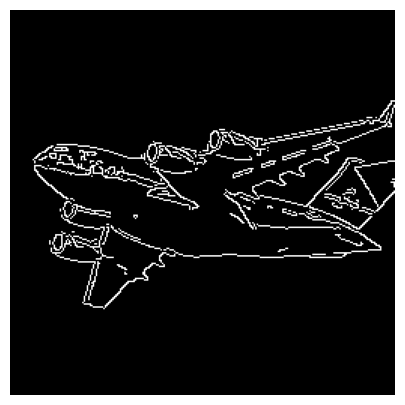

In [75]:
#경계선 감지 : 경계선은 많은 정보가 담긴 영역

#정보가 적은 영역을 제거하고 대부분의 정보가 담긴 이미지 영역을 구분할 수 있음

# 흑백 이미지로 로드

image_gray = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산

median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정

lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))

upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 경계선 감지 함수를 적용

image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# 이미지를 출력

plt.imshow(image_canny, cmap="gray"), plt.axis("off")

plt.show()

### 2. 이미지 분류

In [76]:
import numpy as np

import matplotlib.pyplot as plt

def percent(x):

    return x / np.sum(x)

def softmax(x):

    exp_x = np.exp(x)

    return exp_x / np.sum(exp_x)

In [77]:
#value=np.linspace(-2.5, 2.5, 5) #무한대 문제 발생

#value=np.linspace(0, 2.5, 5) # 출력값이 0이면 학습이 되지 않음

value=np.linspace(1.5, 2.5, 5)

p=percent(value)

s=softmax(value)

print('value:',value)

print('percentage:',p)

print('softmax:',s)

value: [1.5  1.75 2.   2.25 2.5 ]
percentage: [0.15  0.175 0.2   0.225 0.25 ]
softmax: [0.11405072 0.14644403 0.18803785 0.24144538 0.31002201]


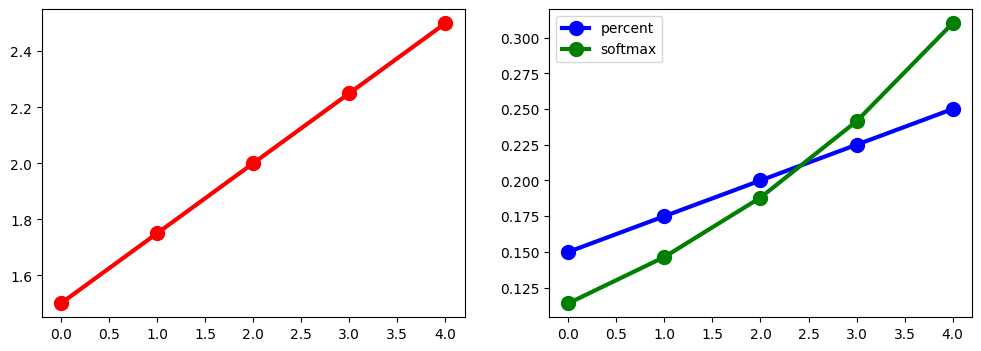

In [78]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)

plt.plot(value,'r.-',label='value')

plt.subplot(1,2,2)

plt.plot(p, 'b.-',label='percent')

plt.plot(s, 'g.-',label='softmax')

plt.legend()

plt.show()

# percent - 직선형태, 활성화함수로 사용하기 어려움

# sigmoid와 비슷한 형태

# 대소관계는 변하지 않고 큰 값은 더 크게, 작은 값은 더 작게 표현되도록 가중치를 조정함

### 2-1 경사하강법

In [79]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',

          'figure.figsize': (8, 5),

         'axes.labelsize': 'large',

         'axes.titlesize':'large',

         'xtick.labelsize':'medium',

         'ytick.labelsize':'medium',

         'lines.markersize': 20,

          'lines.linewidth': 3

         }

pylab.rcParams.update(params)

In [80]:
X_SCALE = 100

In [81]:
#1차 실험

def get_y(x):

  return np.cos(x/X_SCALE) + 1

In [82]:
def get_direction(error, px, cx):

  x_dir = (((cx-px) > 0)-0.5) * 2

  error_dir = -((error > 0)-0.5) * 2

  gradient_dir = x_dir * error_dir

  return gradient_dir * X_SCALE

def get_error(cy, py):

  return cy-py

def set_title(epoch, direction, error, lr):

  title_str = "epoch : %d\nDirection : %.2f, dError : %.2f, lr : %.2f" % (epoch, direction, error, lr)

  plt.title(title_str)

In [83]:
N = 100

x = np.linspace(0, np.pi*2, N) * X_SCALE

y = get_y(x)

p = np.random.randint(0, x.shape[0]-1)

cx = x[p]

cy = y[p]

global global_n

global_n = 0

In [84]:
#2차 실험(학습률을 바꾸면서 테스트) - 국소 최적해와 전역 최적해
learning_rate = 0.1

#learning_rate = 0.5

current_direction = (np.random.rand() - 0.5) * 100

nx = cx + current_direction

ny = get_y(nx)

<Figure size 800x500 with 0 Axes>

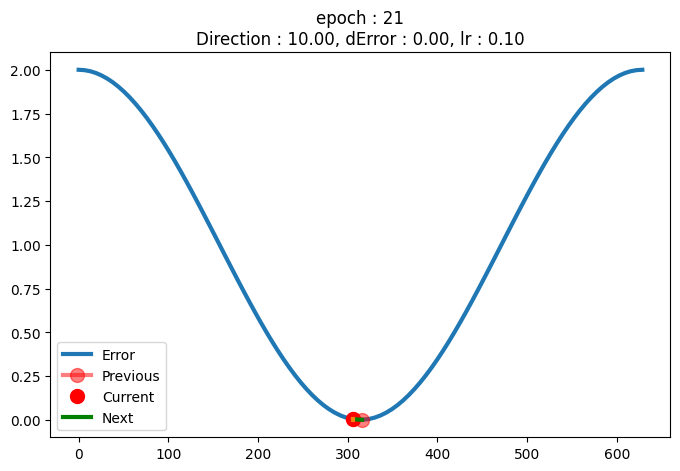

error: [0.3986705122767381, -0.09988740884861147, -0.09901251806629596, -0.09714832693264874, -0.09431346182925848, -0.09053624779115532, -0.08585442549242728, -0.08031477415387955, -0.07397264414052063, -0.0668914039190146, -0.05914180690090809, -0.05080128449792998, -0.04195317245292063, -0.03268587817663682, -0.023091997410126686, -0.013267389038694066, -0.003310217301602636, 0.006680029032554047, -0.006680029032554047, 0.003310217301602636]


In [85]:
from IPython import display

error=[]

for i in range(20):

  px, py = cx, cy # previous

  cx, cy = nx, ny # current

  d_error = get_error(cy, py)

  error.append(d_error)

  current_direction = get_direction(d_error, px, cx) * learning_rate

  nx = cx + current_direction

  ny = get_y(nx)

  display.clear_output(wait=True)

  display.display(plt.gcf())

  plt.plot(x,y)

  plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)

  plt.plot(cx, cy, 'r.')

  plt.plot([cx, nx], [cy, ny], 'g-')

  plt.plot([cx, cx], [cy, ny])

  set_title((i+2), current_direction, d_error, learning_rate)

  plt.legend(['Error', 'Previous', 'Current', 'Next'])

  plt.show(block=False)

  plt.pause(0.5)

print('error:',error)

<Figure size 800x500 with 0 Axes>

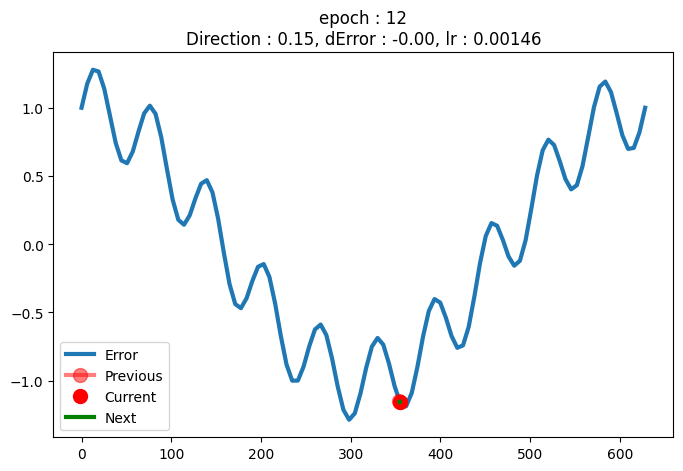

error: [-0.23792448756142115, 0.9784373048048244, -0.48361546421777246, -0.7494881217524982, 0.4258927207161092, -0.21637431717303535, -0.1202294218927874, -0.05016428212141966, -0.021121926694190662, -0.009411616415428536, -0.00440053325284695]
lr: [1.5, 0.75, 0.375, 0.1875, 0.09375, 0.046875, 0.0234375, 0.01171875, 0.005859375, 0.0029296875, 0.00146484375]


In [86]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',

          'figure.figsize': (8, 5),

         'axes.labelsize': 'large',

         'axes.titlesize':'large',

         'xtick.labelsize':'medium',

         'ytick.labelsize':'medium',

         'lines.markersize': 20,

          'lines.linewidth': 3

         }

pylab.rcParams.update(params)

###############################

X_SCALE = 100

###############################

def get_y(x):

  xn = x/X_SCALE

  return np.cos(xn) + (np.sin(xn*10)*0.3)

###############################

def get_direction(error, px, cx):

  x_dir = (((cx-px) > 0)-0.5) * 2

  error_dir = -((error > 0)-0.5) * 2

  gradient_dir = x_dir * error_dir

  return gradient_dir * X_SCALE

def get_error(cy, py):

  return cy-py

###############################

def set_title(epoch, direction, error, lr):

  title_str = "epoch : %d\nDirection : %.2f, dError : %.2f, lr : %.5f" % (epoch, direction, error, lr)

  plt.title(title_str)

###############################

N = 100

x = np.linspace(0, np.pi*2, N) * X_SCALE

y = get_y(x)

p = np.random.randint(0, x.shape[0]-1)

cx = x[p]

cy = y[p]

global global_n

global_n = 0

###############################

#국소 최적해 문제를 해결하기 위한 방안 : rmsprop, Adagrad 등의 알고리즘

###############################

#3차 실험(학습률을 바꾸면서 테스트)

#learning_rate = 0.5

learning_rate = 3.0

current_direction = (np.random.rand() - 0.5) * 100

nx = cx + current_direction

ny = get_y(nx)

###############################

from IPython import display

error=[]

lr=[] #추가

for i in range(20):

  px, py = cx, cy # previous

  cx, cy = nx, ny # current

  d_error = get_error(cy, py)

  #3차 실험(학습률 조절)

  if d_error<1.0:    

    learning_rate=(learning_rate * 0.5)

    if learning_rate < 1e-3:

      break

  error.append(d_error)

  lr.append(learning_rate) #추가

  current_direction = get_direction(d_error, px, cx) * learning_rate

  nx = cx + current_direction

  ny = get_y(nx)

  display.clear_output(wait=True)

  display.display(plt.gcf())

  plt.plot(x,y)

  plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)

  plt.plot(cx, cy, 'r.')

  plt.plot([cx, nx], [cy, ny], 'g-')

  plt.plot([cx, cx], [cy, ny])

  set_title((i+2), current_direction, d_error, learning_rate)

  plt.legend(['Error', 'Previous', 'Current', 'Next'])

  plt.show(block=False)

  plt.pause(0.5)

print('error:',error)

print('lr:',lr) #추가

###############################

### 3) 정규화- dropout

In [87]:
import torch

USE_CUDA = torch.cuda.is_available()

DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [88]:
EPOCHS = 5

BATCH_SIZE = 64

In [89]:
from torchvision import transforms, datasets

#mnist 데이터셋 다운로드, transforms.Compose 텐서로 바꾸면서 0~1 정규화

train_loader = torch.utils.data.DataLoader(

    datasets.MNIST('c:/data',

                   train=True,

                   download=True,

                   transform=transforms.Compose([

                       transforms.RandomHorizontalFlip(), #랜덤 가로방향 전환

                       transforms.ToTensor(),

                       transforms.Normalize((0.1307,), (0.3081,))
                                             #평균,   # 표준편차
                   ])),

    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(

    datasets.MNIST('c:/data',

                   train=False,

                   transform=transforms.Compose([

                       transforms.ToTensor(),

                       transforms.Normalize((0.1307,), (0.3081,))

                   ])),

    batch_size=BATCH_SIZE, shuffle=True)

In [90]:
import torch.nn as nn

import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, dropout_p=0.2):

        super(Net, self).__init__()

        self.fc1 = nn.Linear(784, 256)

        self.fc2 = nn.Linear(256, 128)

        self.fc3 = nn.Linear(128, 10)

        self.dropout_p = dropout_p

    def forward(self, x):

        x = x.view(-1, 784)

        x = F.relu(self.fc1(x))

        x = F.dropout(x, training=self.training,

                      p=self.dropout_p)

        x = F.relu(self.fc2(x))

        x = F.dropout(x, training=self.training,

                      p=self.dropout_p)

        x = self.fc3(x)

        return x

In [91]:
import torch.optim as optim

#과적합과 정규화

model        = Net(dropout_p=0.2).to(DEVICE)

optimizer    = optim.SGD(model.parameters(), lr=0.01)

In [92]:
def train(model, train_loader, optimizer):

    model.train()

    for _, (data, target) in enumerate(train_loader):

        data, target = data.to(DEVICE), target.to(DEVICE)

        optimizer.zero_grad()

        output = model(data)

        loss = F.cross_entropy(output, target)

        loss.backward()

        optimizer.step()

In [93]:
def evaluate(model, test_loader):

    model.eval()

    test_loss = 0

    correct = 0

    with torch.no_grad():

        for data, target in test_loader:

            data, target = data.to(DEVICE), target.to(DEVICE)

            output = model(data)

            #크로스 엔트로피 계산

            test_loss += F.cross_entropy(output, target,

                                         reduction='sum').item()

            # softmax 연산(output에서 최대값 선택)

            pred = output.max(1, keepdim=True)[1]

            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    test_accuracy = 100. * correct / len(test_loader.dataset)

    return test_loss, test_accuracy

In [94]:
for epoch in range(1, EPOCHS + 1):

    train(model, train_loader, optimizer)

    test_loss, test_accuracy = evaluate(model, test_loader)

    

    print(f'[{epoch}] Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')



[1] Test Loss: 0.5474, Accuracy: 82.43%
[2] Test Loss: 0.4218, Accuracy: 86.68%
[3] Test Loss: 0.3482, Accuracy: 89.27%
[4] Test Loss: 0.2915, Accuracy: 90.90%
[5] Test Loss: 0.2489, Accuracy: 92.33%


### 4) 제너레이터

In [112]:
import tensorflow.keras.datasets as ds

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()

x_train=x_train.astype('float32'); x_train/=255

x_train=x_train[0:15,]; y_train=y_train[0:15,]    

class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']



170498071/170498071 [==============================] - 11s 0us/step


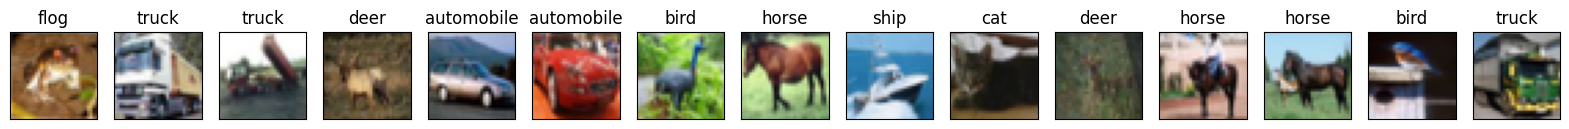

In [113]:
plt.figure(figsize=(20,2))

for i in range(15):

    plt.subplot(1,15,i+1)

    plt.imshow(x_train[i])

    plt.xticks([]); plt.yticks([])

    plt.title(class_names[int(y_train[i])])

plt.show()  

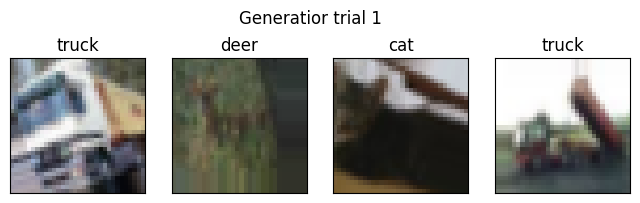

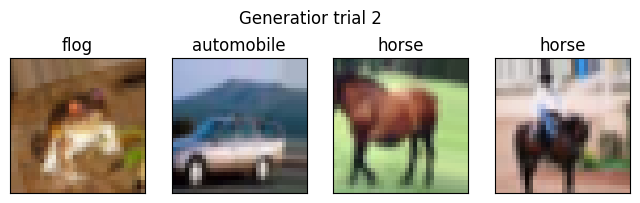

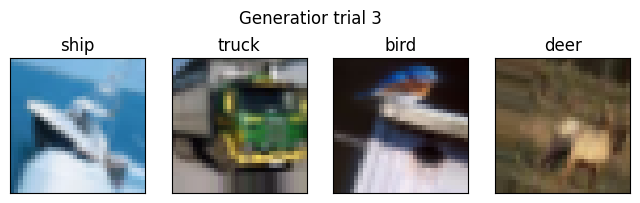

In [114]:
batch_size=4

# rotation_range 각도 범위 내에서 회전

generator=ImageDataGenerator(rotation_range=20.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

gen=generator.flow(x_train,y_train,batch_size=batch_size)

for a in range(3):
    img,label=gen.next()    # batch size만큼 생성

    plt.figure(figsize=(8,2.4))

    plt.suptitle("Generatior trial "+str(a+1))

    for i in range(batch_size):

        plt.subplot(1,batch_size,i+1)

        plt.imshow(img[i])

        plt.xticks([]); plt.yticks([])

        plt.title(class_names[int(label[i])])

    plt.show()


### 5) 이미지 분류

In [115]:
import zipfile  

with zipfile.ZipFile('c:/data/mnist/dataset.zip') as zip_ref:  

    zip_ref.extractall('c:/data/mnist/')

In [116]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1,data_home='c:/data/mnist', as_frame=False)

mnist.data[:5]

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
import numpy as np

X, y = mnist["data"], mnist["target"]

y = y.astype(np.int64)

print(X.shape, y.shape)

(70000, 784) (70000,)


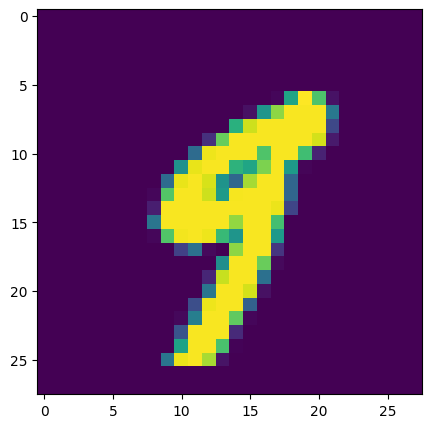

In [118]:
import matplotlib

import matplotlib.pyplot as plt

some_digit = X[36000]

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image)          

plt.show()

In [119]:
def plot_digit(data):

    image = data.reshape(28, 28)

    plt.imshow(image, cmap = matplotlib.cm.binary)

    plt.axis("off")

9

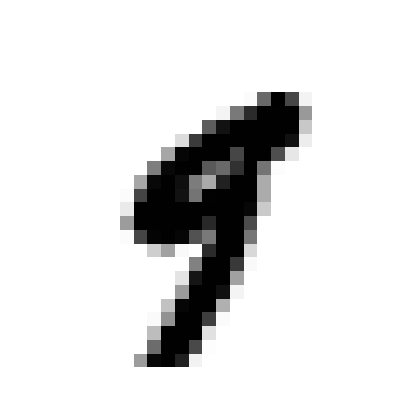

In [120]:
plot_digit(X[36000])
y[36000]

In [121]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [122]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [123]:
# 이진 분류기
y_train_5 = (y_train == 5)

y_test_5 = (y_test == 5)

In [124]:
#확률적 경사하강법 분류모형(온라인학습)

#확률적 경사하강법(Stochastic Gradient Descent, SGD)

#무작위로 1개의 데이터를 추출하여 기울기를 계산

#빠르게 최적점을 찾을 수 있는 알고리즘

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=0)

sgd_clf.fit(X_train, y_train_5)

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5, random_state=0)

In [125]:
sgd_clf.predict([some_digit])

array([False])

In [126]:
#교차검증

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.94575, 0.94225, 0.96675])

In [127]:
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone

#클래스 비율이 유지되는 교차검증

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):

    #분류모형을 복제(데이터는 복제하지 않음)

    clone_clf = clone(sgd_clf)

    #학습용,검증용 구분

    X_train_folds = X_train[train_index]

    y_train_folds = y_train_5[train_index]

    X_test_folds = X_train[test_index]

    y_test_folds = y_train_5[test_index]

    #학습

    clone_clf.fit(X_train_folds, y_train_folds)

    #분류

    y_pred = clone_clf.predict(X_test_folds)

    #정확도

    n_correct = sum(y_pred == y_test_folds)

    print(n_correct / len(y_pred))

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.94575


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.94225
0.96675


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [128]:
#모든 예측결과를 False로 리턴하는 테스트용 클래스

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):

    def fit(self, X, y=None):

        pass

    def predict(self, X):

        # 2원 영배열(행의수는 샘플개수), 0을 False로 리턴

        return np.zeros((len(X), 1), dtype=bool)

In [129]:
never_5_clf = Never5Classifier()

print(never_5_clf.predict(X_train))

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

#정확도가 높음(이미지의 10%가 5이므로 5가 아니라고 분류하면 100-10=90% 정도의 정확도를 가짐)

#이 모형은 좋은 모형이 아님, 특히 불균형 데이터셋의 경우 정확도는 큰 의미가 없을 수 있음

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


array([0.9067 , 0.91225, 0.91   ])

In [130]:
from sklearn.metrics import classification_report

print(classification_report(never_5_clf.predict(X_train), y_train_5))

              precision    recall  f1-score   support

       False       1.00      0.91      0.95     60000
        True       0.00      0.00      0.00         0

    accuracy                           0.91     60000
   macro avg       0.50      0.45      0.48     60000
weighted avg       1.00      0.91      0.95     60000



c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [131]:
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix

y_train_pred = sgd_clf.predict(X_train)

#오차행렬

cm=confusion_matrix(y_train_5, y_train_pred)

print(cm)

tn, fp, fn, tp = cm.ravel()

print(tn, fp, fn, tp)

[[54415   164]
 [ 2132  3289]]
54415 164 2132 3289


In [132]:
from sklearn.metrics import precision_score, recall_score

#정밀도 : TP / (TP+FP) , 모형이 1로 분류한 것 중 실제로 1인 것의 비율

print(precision_score(y_train_5, y_train_pred))

print(tp/(tp+fp))

0.9525050680567623
0.9525050680567623


In [133]:
#민감도(TPR, True Positive Rate) - 1을 1로 잘 맞춘 비율, 재현율(recall)이라고도 함

print(recall_score(y_train_5, y_train_pred))

print(tp/(tp+fn))

0.6067146282973621
0.6067146282973621


In [134]:
from sklearn.metrics import f1_score

# 정밀도와 재현율의 조화 평균

f1_score(y_train_5, y_train_pred)

# 정밀도와 재현율은 반비례하는 관계 : 정밀도를 높이면 재현율이 떨어지고 재현율이 높아지면 정밀도가 낮아짐

# 정밀도/재현율 트레이드오프라고 함

0.7412666215911653

In [135]:
#sgd 모형의 판별 함수

y_scores = sgd_clf.decision_function([some_digit])

y_scores

array([-413880.56831014])

In [136]:
#판별함수의 값 0을 기준으로 분류하는 경우

threshold = 0

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred # False로 분류됨

array([False])

In [137]:
#판별함수의 결과값을 조절함

threshold = -417921

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

In [ ]:
#예측결과가 아닌 결정점수를 리턴하는 교차검증

In [138]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

print(y_scores)

print(y_scores.shape)

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[-317526.29489211 -296907.58534629 -516725.0471247  ... -579193.32176211
  293644.95106509 -507557.89074007]
(60000,)


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


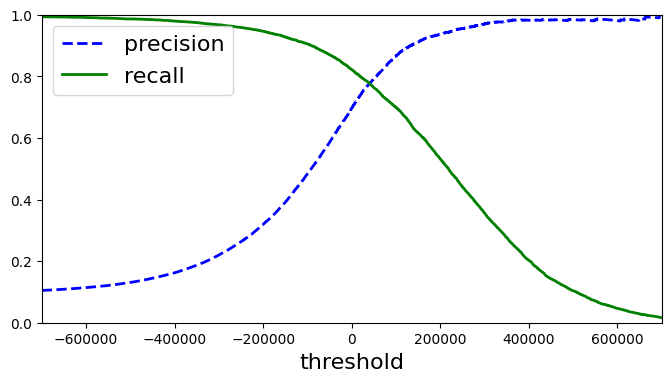

In [139]:
from sklearn.metrics import precision_recall_curve

#판별함수의 결과값을 이용하여 모든 임계값에 대한 정밀도와 재현율 계산

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)

    plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)

    plt.xlabel("threshold", fontsize=16)

    plt.legend(loc="upper left", fontsize=16)

    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.xlim([-700000, 700000])

plt.show()

#판별기준을 높이면 정밀도는 높아지고 재현율은 낮아짐

#판별기준을 낮추면 정밀도는 낮아지고 재현율은 높아짐

In [140]:
def plot_precision_vs_recall(precisions, recalls):

    plt.plot(recalls, precisions, "b-", linewidth=2)

    plt.xlabel("recall", fontsize=16)

    plt.ylabel("precision", fontsize=16)

    plt.axis([0, 1, 0, 1])

    plt.figure(figsize=(8, 6))
    
    plot_precision_vs_recall(precisions, recalls)
    
    plt.show()
    
    #precision과 recall은 반비례 관계

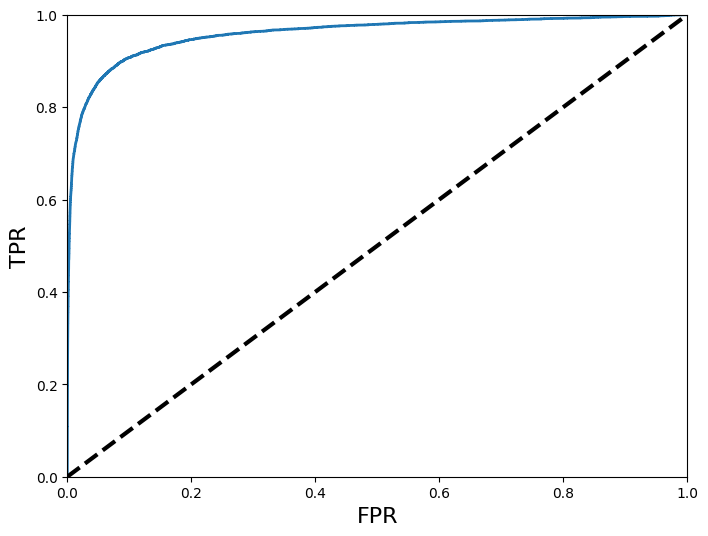

In [141]:
# ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)

    plt.plot([0, 1], [0, 1], 'k--')

    plt.axis([0, 1, 0, 1])

    plt.xlabel('FPR', fontsize=16)

    plt.ylabel('TPR', fontsize=16)

plt.figure(figsize=(8, 6))

plot_roc_curve(fpr, tpr)

plt.show()

In [142]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

#면적이 1에 가까울수록 완벽한 모형, 0.5이면 완전한 랜덤 분류기

0.9594242503413436

In [ ]:
#sgd 모형과 비교하기 위하여 랜덤포레스트모형 추가

In [143]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

# predict_proba : 랜덤포레스트에서 decision_function() 대신 제공되는 함수

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

In [ ]:
y_probas_forest # 0일 확률, 1일 확률

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # 1일 확률

print(y_scores_forest)

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.legend(loc="lower right", fontsize=16)

plt.show()

In [ ]:
#sgd보다 랜덤포레스트 모형의 성능이 더 좋음

roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

precision_score(y_train_5, y_train_pred_forest)

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

In [ ]:
# 다중 분류

In [ ]:
#다중분류를 위해 모든 데이터를 학습에 사용

sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

#내부적으로 10개의 이진분류기를 훈련시키고 각각의 결정점수를 비교하여 가장 점수가 높은 클래스를 선택함

In [ ]:
#판별함수 확인, 클래스별로 10개의 점수가 출력됨

some_digit_scores = sgd_clf.decision_function([some_digit])

print(some_digit_scores)

#가장 높은 점수 출력

print(np.argmax(some_digit_scores))

#라벨(클래스) 리스트

print(sgd_clf.classes_)

#분류한 라벨 이름

print(sgd_clf.classes_[5])

In [ ]:
#일대다전략과 일대일전략

#일대다전략(one versus all, one versus the rest): 각 분류기의 결정점수 중에서 가장 높은 것을 선택하는 전략(0만 찾는 모형, 1만 찾는 모형, 대부분의 알고리즘에서 사용하는 방식)

#일대일전략(one versus one): 0과 1, 0과 2 등으로 각 숫자의 조합마다 여러개의 모형을 만들어서 가장 성능이 좋은 모형을 채택하는 방식(svm에서 사용하는 방식)

#사이킷런에서는 svm일 경우 OvO(일대일전략)을 다른 분류모형일 경우 OvA(일대다전략)을 선택함, 랜덤포레스트모형은 앙상블 모형이므로 사이킷런의 OvA, OvO를 적용하지 않음

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

#일대일전략을 사용하도록 지정하는 방법

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=0))

ovo_clf.fit(X_train, y_train)

ovo_clf.predict([some_digit])

In [ ]:
len(ovo_clf.estimators_) #일대일전략에서 사용하는 분류기의 개수

In [ ]:
pred=ovo_clf.predict(X_test)

np.mean(pred == y_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

#1대다 전략(0과 1~9)

ovr_clf=OneVsRestClassifier(SGDClassifier(max_iter=5, random_state=10))

ovr_clf.fit(X_train, y_train)

In [ ]:
len(ovr_clf.estimators_) #분류기 개수

In [ ]:
pred=ovr_clf.predict(X_test)

np.mean(pred == y_test)

In [ ]:
# 다중 레이블 분류

In [ ]:
#학습시간이 오래 걸림

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) #7,8,9

y_train_odd = (y_train % 2 == 1) #홀수

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

# 7,8,9에 해당되고  홀수이다

### 6) 교차검증

In [95]:
# 1. K-fold 교차 검증

from sklearn import datasets

from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

# 숫자 데이터셋을 로드

digits = datasets.load_digits()

digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

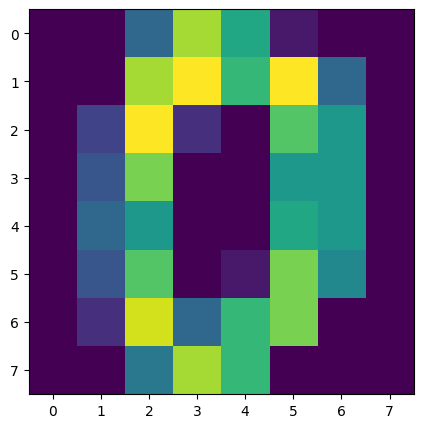

In [96]:
import matplotlib.pyplot as plt  

plt.imshow(digits.data[0].reshape(8,8))  

plt.show()

In [97]:
# 특성 행렬

features = digits.data

target = digits.target

# 표준화 객체

standardizer = StandardScaler()

# 로지스틱 회귀 객체

logit = LogisticRegression()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인

pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증

kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k-폴드 교차검증을 수행

cv_results = cross_val_score(pipeline, # 파이프라인

                             features, # 특성 행렬

                             target, # 타깃 벡터

                             cv=kf, # 교차 검증 기법

                             scoring="accuracy", # 평가 지표

                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산

cv_results.mean()

0.9693916821849783

In [98]:
# 2. ShuffleSplit : 반복횟수에 관계없이 학습용, 검증용 데이터셋을 임의로 지정할 수 있음

# 반복마다 랜덤하게 분할하므로 하나의 샘플이 여러번 포함될 수 있음

from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기(학습용 50%, 검증용 20%)

ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

pipeline=make_pipeline(standardizer, logit)

# 교차검증을 수행

cv_results = cross_val_score(pipeline, # 파이프라인

                             features, # 특성 행렬

                             target, # 타깃 벡터

                             cv=ss, # 교차 검증 기법

                             scoring="accuracy", # 평가 지표

                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산

cv_results.mean()

0.9630555555555554

In [99]:
# 3. RepeatedKFold 교차검증

from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기(10회 교차검증을 5회 반복)

rk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행

cv_results = cross_val_score(pipeline, # 파이프라인

                             features, # 특성 행렬

                             target, # 타깃 벡터

                             cv=rk, # 교차 검증 기법

                             scoring="accuracy", # 평가 지표

                             n_jobs=-1) # 모든 CPU 코어 사용

# 검증 점수 개수를 확인

print(len(cv_results))

# 평균을 계산

print(cv_results.mean())

50
0.9695065176908755


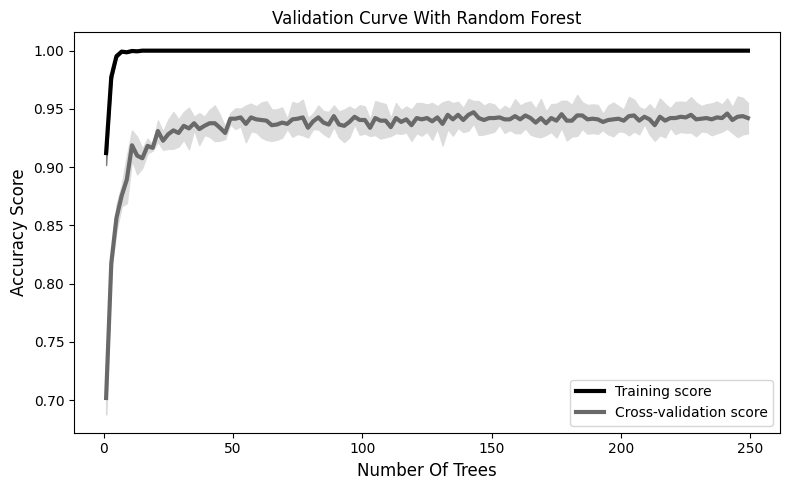

In [100]:
# 4. 하이퍼파라미터 값의 영향을 시각화하기

import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import validation_curve

# 데이터를 로드

digits = load_digits()

# 특성 행렬과 타깃 벡터

features, target = digits.data, digits.target

# 파라미터 값의 범위

param_range = np.arange(1, 250, 2)

# 파라미터 값의 범위를 사용하여 학습용 데이터셋과 검증용 데이터셋의 정확도를 계산

train_scores, test_scores = validation_curve(

    RandomForestClassifier(),

    features,

    target,

    param_name="n_estimators",

    param_range=param_range,

    cv=3,

    scoring="accuracy",

    n_jobs=-1)

# 학습용 데이터셋 점수의 평균과 표준 편차를 계산

train_mean = np.mean(train_scores, axis=1)

train_std = np.std(train_scores, axis=1)

# 검증용 데이터셋 점수의 평균과 표준 편차를 계산

test_mean = np.mean(test_scores, axis=1)

test_std = np.std(test_scores, axis=1)

# 학습용 데이터셋과 검증용 데이터셋의 평균 정확도 점수

plt.plot(param_range, train_mean, label="Training score", color="black")

plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# 학습용 데이터셋과 검증용 데이터셋의 정확도에 대한 표준 편차 그래프

plt.fill_between(param_range, train_mean - train_std,

                 train_mean + train_std, color="gray")

plt.fill_between(param_range, test_mean - test_std,

                 test_mean + test_std, color="gainsboro")

# 그래프를 출력

plt.title("Validation Curve With Random Forest")

plt.xlabel("Number Of Trees")

plt.ylabel("Accuracy Score")

plt.tight_layout()

plt.legend(loc="best")

plt.show()

import zipfile

with zipfile.ZipFile('c:/data/mnist/dataset.zip') as zip_ref:  

    zip_ref.extractall('c:/data/mnist/')

In [101]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1,data_home='c:/data/mnist', as_frame=False)

mnist.data[:5]

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
import numpy as np

X, y = mnist["data"], mnist["target"]

y = y.astype(np.int64)

print(X.shape, y.shape)

(70000, 784) (70000,)


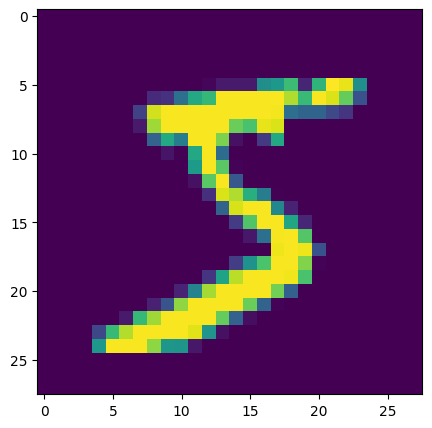

In [103]:
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28,28))  

plt.show()

In [104]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [105]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [106]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):

    image = image.reshape((28, 28))

    shifted_image = shift(image, [dy, dx])

    return shifted_image.reshape([-1])

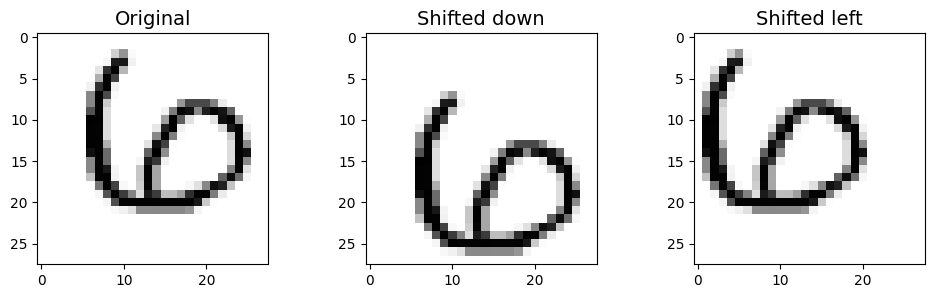

In [107]:
import matplotlib.pyplot as plt

image = X_train[70]

shifted_image_down = shift_image(image, 0, 5)

shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))

plt.subplot(131)

plt.title("Original", fontsize=14)

plt.imshow(image.reshape(28, 28), cmap="Greys")

plt.subplot(132)

plt.title("Shifted down", fontsize=14)

plt.imshow(shifted_image_down.reshape(28, 28), cmap="Greys")

plt.subplot(133)

plt.title("Shifted left", fontsize=14)

plt.imshow(shifted_image_left.reshape(28, 28), cmap="Greys")

plt.show()

In [108]:
#오래 걸림

X_train_augmented = [image for image in X_train]

y_train_augmented = [label for label in y_train]

#원본 이미지 6만개 + 쉬프트 이미지 24만개 => 30만개로 증식됨

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):

        for image, label in zip(X_train, y_train):

            X_train_augmented.append(shift_image(image, dx, dy))

            y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)

y_train_augmented = np.array(y_train_augmented)

In [109]:
shuffle_idx = np.random.permutation(len(X_train_augmented))

X_train_augmented = X_train_augmented[shuffle_idx]

y_train_augmented = y_train_augmented[shuffle_idx]

In [146]:
X_train_augmented.shape
y_train_augmented[0:6]

array([6, 8, 2, 8, 4, 2], dtype=int64)

In [110]:
#오래 걸림

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1)

knn_clf.fit(X_train_augmented[:1000], y_train_augmented[:1000])

KNeighborsClassifier(n_neighbors=1)

In [111]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test[:1000])

accuracy_score(y_test[:1000], y_pred[:1000])

0.816